## Sistema de colas
### Ejemplo 5.6 del libro de "Simulación un enfoque práctico" .



Un sistema de colas es un modelo matemático utilizado para describir y analizar situaciones en las que hay "clientes" que llegan para recibir un "servicio" y pueden necesitar esperar en una "cola" si el servicio no está disponible inmediatamente. Estos sistemas se aplican en una variedad de contextos, como en las líneas de espera en supermercados, llamadas en un centro de atención telefónica, paquetes esperando procesamiento en una red de comunicaciones, y muchos más.


## Componentes de un Sistema de Colas

* Clientes:
  * Son las entidades que llegan al sistema para recibir un servicio. Ejemplos de clientes pueden ser personas en una fila, llamadas telefónicas, tareas de procesamiento en un servidor, etc.
* Servidor(es):
  * Son las unidades que proporcionan el servicio a los clientes. Puede haber uno o más servidores en un sistema de colas.
* Cola:
  * Es el lugar donde los clientes esperan si todos los servidores están ocupados. La longitud de la cola puede ser finita o infinita.
* Disciplina de Cola:
  * Reglas que determinan el orden en que los clientes son atendidos. Las disciplinas más comunes son:
    * FIFO (First In, First Out): Los primeros en llegar son los primeros en ser atendidos.
    * LIFO (Last In, First Out): Los últimos en llegar son los primeros en ser atendidos
    * SIRO (Serve In Random Order): Los clientes son atendidos en un orden aleatorio.
    * Prioridades: Los clientes con mayor prioridad son atendidos primero.
   
* Tasa de Llegada:
  * La frecuencia con la que los clientes llegan al sistema, comúnmente modelada por una distribución de probabilidad como la distribución de Poisson.
* Tasa de Servicio:
  * La frecuencia con la que los servidores pueden atender a los clientes, también comúnmente modelada por una distribución de probabilidad como la distribución exponencial.
 
## Métricas de Desempeño de un Sistema de Colas.
* Tiempo de Espera en la Cola:
  * El tiempo promedio que un cliente pasa esperando en la cola antes de ser atendido.
* Tiempo de Servicio:
  * El tiempo promedio que un servidor tarda en atender a un cliente.
* Tiempo de Permanencia en el Sistema:
  * La suma del tiempo de espera y el tiempo de servicio, es decir, el tiempo total que un cliente pasa en el sistema.
* Longitud de la Cola:
  * El número promedio de clientes en la cola en un momento dado.
* Utilización del Servidor:
  * La proporción del tiempo durante la cual el servidor está ocupado atendiendo a clientes.



El ejemplo 5.6 del libro, "Simulacion un enfoque práctico" consiste en un supermercado que recibe cargamemtos a partir de las 11:00 PM hasta las 7:00 AM. 

# * Factores a tomar en cuenta

* $\textbf{Nota:}$Todos los factores tiene una probabilidad empirica.


In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta
import datetime



Los camiones al momento de empezar el turno ya pueden estar esperando, esta situacion sigue la siguiente probabilidad:

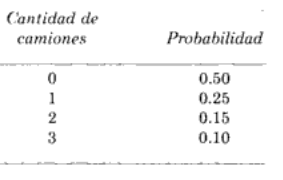

Programandolo por medio de la transformada inversa:

In [2]:
## Camiones que esperan al empezar al operar el almacen

def Cam_ini(N,VP):
    C=[]
    VPA=np.cumsum(VP)
    for i in range (N):
        x=rd.random()
        if 0<= x < VPA[0]:
            Y=0
            C.append(Y)
        elif VPA[0] <= x < VPA[1]:
            Y=1
            C.append(Y)
        elif VPA[1] <= x < VPA[2]:
            Y=2
            C.append(Y)
        else: 
            Y=3
            C.append(Y)

    return C

In [3]:
n=5000
v=[0.5, 0.25, 0.15, 0.10]             
G= Cam_ini(n,v)

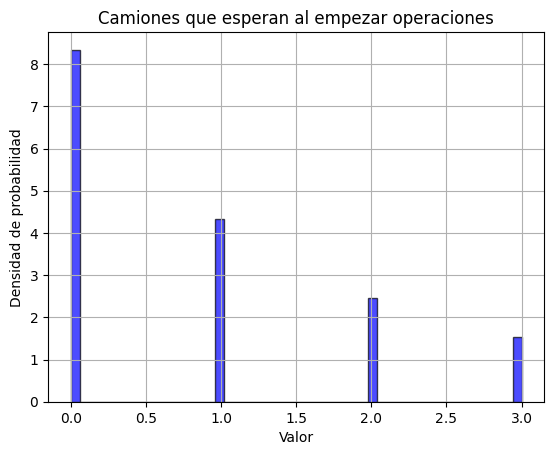

In [4]:

# Crear histograma para visualizar la distribución
plt.hist(G, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Camiones que esperan al empezar operaciones')
plt.grid(True)

# Mostrar la gráfica
plt.show()

Del histograma aterior podemos ver:
* Que los datos se van a puntos especificos esto debido a que es una probabilidad empirica.
* Es muy probable que al abrir haya a lo más un camión.

  
Por otra parte, se sabe que la distribución de probabilidad del tiempo entre llegadas, es la siguiente:

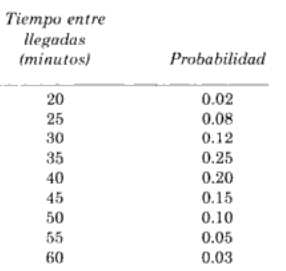

Programando con el método de transformada inversa y simulando datos que siguen esta distribución obtenemos el siguiente histograma.


In [5]:
## Simular el tiempo entre entregras con transformada inversa.


def t_E(N,VP):
    J=np.arange(20, 65,5)
    VPA=np.cumsum(VP) # Vector de probabilidad aculada.
    C=[] # Matriz vacia donde se alojaran los datos simulados.
    for i in range(N):
        x=rd.random() # v.a con distribucion uniforme. 
        if x < VP[0]:
            X=J[0]
            C.append(X)
        elif VPA[0] < x <= VPA[1]:
            X=J[1]
            C.append(X)
        elif VPA[1]<= x < VPA[2]:
            X=J[2] 
            C.append(X)
        elif VPA[2] <= x < VPA[3]:
            X = J[3]
            C.append(X)
        elif VPA[3] <= x < VPA[4]:
            X = J[4]
            C.append(X)
        elif VPA[4] <= x < VPA[5]:
            X = J[5]
            C.append(X)
        elif VPA[5] <= x < VPA[6]:
            X = J[6]
            C.append(X)
        elif VPA[6] <= x < VPA[7]:
            X = J[7]
            C.append(X)
        else:
            X = J[8]
            C.append(X)
            
        


    return C

In [6]:
k= [0.02, 0.08, 0.12, 0.25, 0.20, 0.15, 0.10, 0.05, 0.03]
N=5000
J= t_E(N,k)


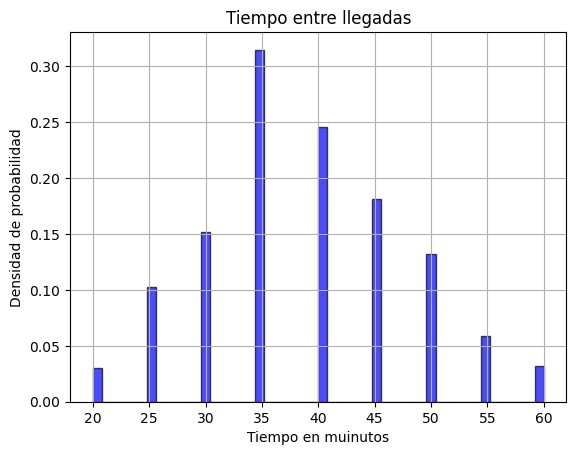

In [7]:
# Crear histograma para visualizar la distribución
plt.hist(J, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Tiempo en muinutos')
plt.ylabel('Densidad de probabilidad')
plt.title('Tiempo entre llegadas')
plt.grid(True)

# Mostrar la gráfica
plt.show()

Del histograma podemos inferir que en su mayoría los camiones van a llegar con una diferencia de entre 35 - 40 minutos.

Finalmente se hace el análisis del tiempo de servicio para diferentes tamaño de equipo ( 3-6 personas ), para tres personas sigue la siguiente distribución.

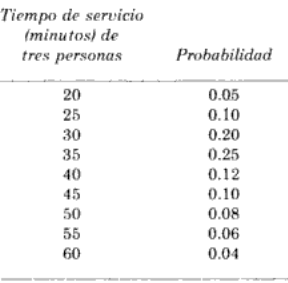

Si lo programamos con el método de la transformada inversa y gráficamos su histograma.


In [8]:
## Equipo de tres personas Tiempo de servicio.

def Eq3(VP,N):
    C=[] # Matriz Vacia.
    VPA = np.cumsum(VP) #Vector de probabilidad acumulada.
    J=np.arange(20, 65,5)#Vector de tiempos. 20 - 60 minutos 

    for i in range(N):
        x=rd.random() # v.a con distribucion uniforme. 
        if x < VP[0]:
            X=J[0]
            C.append(X)
        elif VPA[0] < x <= VPA[1]:
            X=J[1]
            C.append(X)
        elif VPA[1]<= x < VPA[2]:
            X=J[2] 
            C.append(X)
        elif VPA[2] <= x < VPA[3]:
            X = J[3]
            C.append(X)
        elif VPA[3] <= x < VPA[4]:
            X = J[4]
            C.append(X)
        elif VPA[4] <= x < VPA[5]:
            X = J[5]
            C.append(X)
        elif VPA[5] <= x < VPA[6]:
            X = J[6]
            C.append(X)
        elif VPA[6] <= x < VPA[7]:
            X = J[7]
            C.append(X)
        else:
            X = J[8]
            C.append(X)
            
        


    return C
    

In [9]:
l=[0.05, 0.1, 0.20, 0.25, 0.12, 0.10, 0.08, 0.06, 0.04]
O= Eq3(l,n)

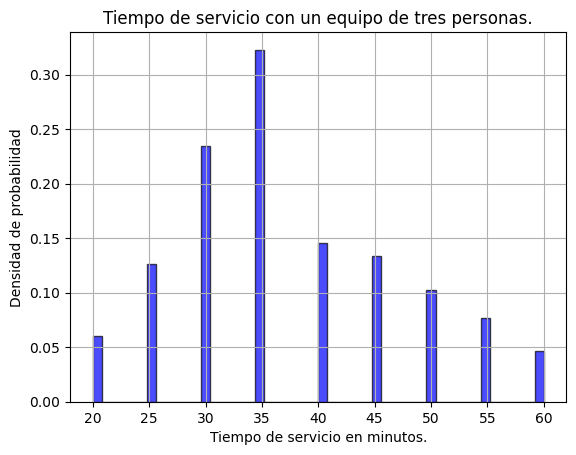

In [10]:
# Crear histograma para visualizar la distribución
plt.hist(O, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Tiempo de servicio en minutos.')
plt.ylabel('Densidad de probabilidad')
plt.title('Tiempo de servicio con un equipo de tres personas.')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [11]:
print(np.mean(O))

37.382


Notamos que el equipo de tres personas tiene una media de servicio de 37 minutos.

Para un equipo de cuatro personas sigue la siguiente distribucion de probabilidad:

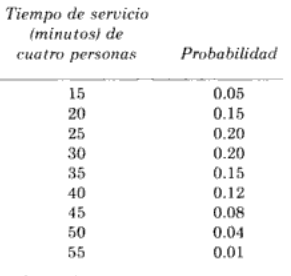


Programandola

In [12]:
## Equipo de cuatro personas

def Eq4(VP,N):
    C=[] # Matriz Vacia.
    VPA = np.cumsum(VP) #Vector de probabilidad acumulada.
    J=np.arange(15, 60,5)#Vector de tiempos. 15 - 55 minutos 

    for i in range(N):
        x=rd.random() # v.a con distribucion uniforme. 
        if x < VP[0]:
            X=J[0]
            C.append(X)
        elif VPA[0] < x <= VPA[1]:
            X=J[1]
            C.append(X)
        elif VPA[1]<= x < VPA[2]:
            X=J[2] 
            C.append(X)
        elif VPA[2] <= x < VPA[3]:
            X = J[3]
            C.append(X)
        elif VPA[3] <= x < VPA[4]:
            X = J[4]
            C.append(X)
        elif VPA[4] <= x < VPA[5]:
            X = J[5]
            C.append(X)
        elif VPA[5] <= x < VPA[6]:
            X = J[6]
            C.append(X)
        elif VPA[6] <= x < VPA[7]:
            X = J[7]
            C.append(X)
        else:
            X = J[8]
            C.append(X)
            
        


    return C
    

In [13]:
P=[0.05, 0.15, 0.20, 0.20, 0.15, 0.12, 0.08, 0.04, 0.01]

i= Eq4(P,N)

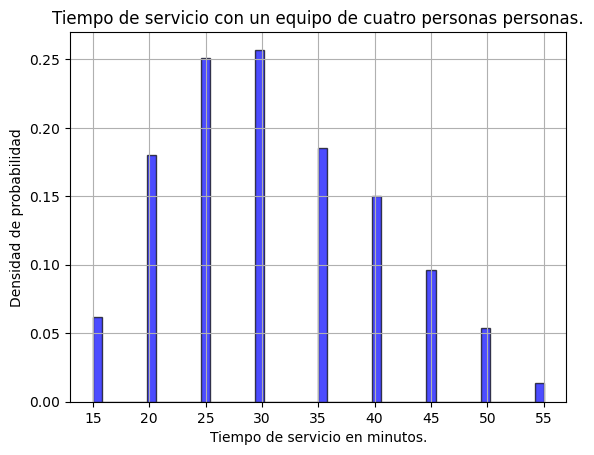

In [14]:
# Crear histograma para visualizar la distribución
plt.hist(i, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Tiempo de servicio en minutos.')
plt.ylabel('Densidad de probabilidad')
plt.title('Tiempo de servicio con un equipo de cuatro personas personas.')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [15]:
print("Media de trabajo para un equipo de cuatro personas:",np.mean(i),"min")

Media de trabajo para un equipo de cuatro personas: 31.044 min


Para un equipo de trabajo de cinco personas:


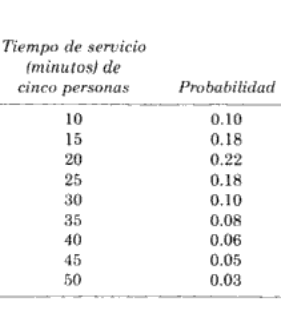

In [16]:
## Equipo de 5 personas

def Eq5(VP,N):
    C=[] # Matriz Vacia.
    VPA = np.cumsum(VP) #Vector de probabilidad acumulada.
    J=np.arange(10, 55,5)#Vector de tiempos. 10 - 50 minutos 

    for i in range(N):
        x=rd.random() # v.a con distribucion uniforme. 
        if x < VP[0]:
            X=J[0]
            C.append(X)
        elif VPA[0] < x <= VPA[1]:
            X=J[1]
            C.append(X)
        elif VPA[1]<= x < VPA[2]:
            X=J[2] 
            C.append(X)
        elif VPA[2] <= x < VPA[3]:
            X = J[3]
            C.append(X)
        elif VPA[3] <= x < VPA[4]:
            X = J[4]
            C.append(X)
        elif VPA[4] <= x < VPA[5]:
            X = J[5]
            C.append(X)
        elif VPA[5] <= x < VPA[6]:
            X = J[6]
            C.append(X)
        elif VPA[6] <= x < VPA[7]:
            X = J[7]
            C.append(X)
        else:
            X = J[8]
            C.append(X)
            
        


    return C
    

In [17]:
p=[0.10, 0.18, 0.22, 0.18, 0.10, 0.08, 0.06, 0.05, 0.03]
 
z= Eq5(p,N)

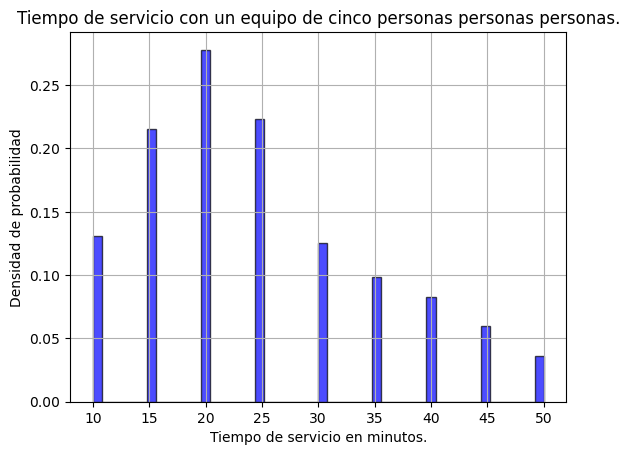

In [18]:
# Crear histograma para visualizar la distribución
plt.hist(z, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Tiempo de servicio en minutos.')
plt.ylabel('Densidad de probabilidad')
plt.title('Tiempo de servicio con un equipo de cinco personas personas personas.')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [19]:
print("Media de trabajo para un equipo de cinco personas:",np.mean(z),"min")

Media de trabajo para un equipo de cinco personas: 24.56 min


Y para un equipo de 6 personas:

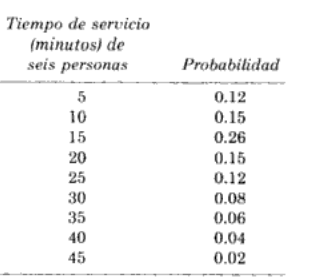

In [20]:
## Equipo de 6 personas

def Eq6(VP,N):
    C=[] # Matriz Vacia.
    VPA = np.cumsum(VP) #Vector de probabilidad acumulada.
    J=np.arange(5, 50,5)#Vector de tiempos. 5 - 45 minutos 

    for i in range(N):
        x=rd.random() # v.a con distribucion uniforme. 
        if x < VP[0]:
            X=J[0]
            C.append(X)
        elif VPA[0] < x <= VPA[1]:
            X=J[1]
            C.append(X)
        elif VPA[1]<= x < VPA[2]:
            X=J[2] 
            C.append(X)
        elif VPA[2] <= x < VPA[3]:
            X = J[3]
            C.append(X)
        elif VPA[3] <= x < VPA[4]:
            X = J[4]
            C.append(X)
        elif VPA[4] <= x < VPA[5]:
            X = J[5]
            C.append(X)
        elif VPA[5] <= x < VPA[6]:
            X = J[6]
            C.append(X)
        elif VPA[6] <= x < VPA[7]:
            X = J[7]
            C.append(X)
        else:
            X = J[8]
            C.append(X)
            
        


    return C
    

In [21]:
fp=[0.12, 0.15, 0.26, 0.15, 0.12, 0.08, 0.06, 0.04, 0.02]

m= Eq6(fp,N)

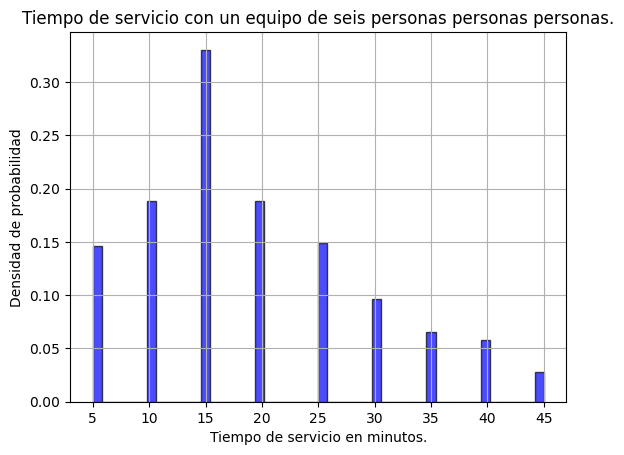

In [22]:
# Crear histograma para visualizar la distribución
plt.hist(m, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Tiempo de servicio en minutos.')
plt.ylabel('Densidad de probabilidad')
plt.title('Tiempo de servicio con un equipo de seis personas personas personas.')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [23]:
print("Media de trabajo para un equipo de seis personas:",np.mean(m),"min")

Media de trabajo para un equipo de seis personas: 19.063 min



Si bien lo anterior no puede dar que en un número repetido de casos los tiempos empleados ya sea entre entregas o de servicios, lo que nos interasa es ver como se comporta el proceso de descargas en el supermercado.



In [24]:
## Camiones que esperan al empezar al operar el almacen

def Cam_ini_1(x):
    VP=[0.5, 0.25, 0.15, 0.10]
    VPA=np.cumsum(VP)     
    if 0<= x < VPA[0]:
        Y=0
    elif VPA[0] <= x < VPA[1]:
        Y=1
    elif VPA[1] <= x < VPA[2]:
        Y=2
    else: 
        Y=3
    return Y

In [44]:
## Simular el tiempo entre entregras con transformada inversa.


def t_E_1(x):
    J=np.arange(20, 65,5)
    VP=[0.02, 0.08, 0.12, 0.25, 0.20, 0.15, 0.10, 0.05, 0.03]
    VPA=np.cumsum(VP) # Vector de probabilidad aculada. 
    if x < VP[0]:
        X=J[0]
    elif VPA[0] < x <= VPA[1]:
        X=J[1]
    elif VPA[1]<= x < VPA[2]:
        X=J[2] 
    elif VPA[2] <= x < VPA[3]:
        X = J[3]
    elif VPA[3] <= x < VPA[4]:
        X = J[4]
    elif VPA[4] <= x < VPA[5]:
        X = J[5]
    elif VPA[5] <= x < VPA[6]:
        X = J[6]
    elif VPA[6] <= x < VPA[7]:
        X = J[7]
    else:
        X = J[8]
    return X

In [45]:
from datetime import datetime, timedelta
#Tiempo entre llegadas
def calcular_tiempos_de_llegada_1(hora_inicial, tiempos_entre_llegadas, hora_final):
    # Convertir la hora inicial a un objeto datetime
    hora_actual = datetime.strptime(hora_inicial, "%I:%M %p")

    # Limite de tiempo
    hora_limite = datetime.strptime(hora_final, "%I:%M %p") + timedelta(days=1)

    # Lista para almacenar los tiempos de llegada
    tiempos_de_llegada = [hora_actual.strftime("%I:%M %p")]

    for tiempo in tiempos_entre_llegadas:
        # Incrementar la hora actual por el tiempo entre llegadas
        # Convertir tiempo (NumPy integer) a un entero de Python
        hora_actual += timedelta(minutes=int(tiempo)) 

        # Si la hora actual excede el límite, detenerse
        if hora_actual > hora_limite:
            break

        # Agregar el tiempo de llegada a la lista
        tiempos_de_llegada.append(hora_actual.strftime("%I:%M %p"))

    return tiempos_de_llegada

In [46]:
import pandas as pd

def calcular_terminacion_servicio(inicio_servicio, tiempo_servicio):
    """
    Calcula la hora de terminación del servicio.
    
    Args:
    inicio_servicio (list of str): Lista de horas de inicio del servicio en formato '%I:%M %p'.
    tiempo_servicio (list of int): Lista de tiempos de servicio en minutos.
    
    Returns:
    list of str: Lista de horas de terminación del servicio en formato '%I:%M %p'.
    """
    terminacion_servicio = []
    for inicio, duracion in zip(inicio_servicio, tiempo_servicio):
        hora_inicio = pd.to_datetime(inicio, format='%I:%M %p')
        hora_terminacion = hora_inicio + pd.to_timedelta(duracion, unit='m')
        terminacion_servicio.append(hora_terminacion.strftime('%I:%M %p'))
    return terminacion_servicio



In [47]:
import pandas as pd

def diferencia_en_minutos(vector1, vector2):#Para calcular el timepo de espera
    """
    Calcula la diferencia en minutos entre dos vectores de horas.
    
    Args:
    vector1 (list of str): Primer vector de horas en formato string.
    vector2 (list of str): Segundo vector de horas en formato string.
    
    Returns:
    list of int: Diferencias en minutos entre los elementos correspondientes de los dos vectores.
    """
    # Convertir las horas a pd.Timestamp
    vector1 = [pd.to_datetime(t, format="%I:%M %p") for t in vector1]
    vector2 = [pd.to_datetime(t, format="%I:%M %p") for t in vector2]
    
    # Asegurarse de que ambos vectores tengan la misma longitud
    if len(vector1) != len(vector2):
        raise ValueError("Ambos vectores deben tener la misma longitud")
    
    # Calcular la diferencia en minutos
    diferencias = [(t1 - t2).total_seconds() / 60 for t1, t2 in zip(vector1, vector2)]
    
    return diferencias





In [48]:
def reemplazar_ultima_entrada_con_cero(vector):
    """
    Reemplaza la última entrada de un vector con cero.
    
    Args:
    vector (list): El vector al que se le quiere reemplazar la última entrada.
    
    Returns:
    list: El vector con la última entrada reemplazada por cero.
    """
    if len(vector) > 0:
        vector[-1] = 0
    return vector



### Los programas anteriores se utilizaran de manera general, ahora veremos el caso si el equipo es de 3 personas.


In [49]:
## Equipo de tres personas Tiempo de servicio.

def Eq3_1(x):
    VP=[0.05, 0.1, 0.20, 0.25, 0.12, 0.10, 0.08, 0.06, 0.04] #Vector de probabilidades.
    VPA = np.cumsum(VP) #Vector de probabilidad acumulada.
    J=np.arange(20, 65,5)#Vector de tiempos. 20 - 60 minutos 
    if x < VP[0]:
        X=J[0]
    elif VPA[0] < x <= VPA[1]:
        X=J[1]
    elif VPA[1]<= x < VPA[2]:
        X=J[2] 
    elif VPA[2] <= x < VPA[3]:
        X = J[3]
    elif VPA[3] <= x < VPA[4]:
        X = J[4]
    elif VPA[4] <= x < VPA[5]:
        X = J[5]
    elif VPA[5] <= x < VPA[6]:
        X = J[6]
    elif VPA[6] <= x < VPA[7]:
        X = J[7]
    else:
        X = J[8]
    return X
    

In [63]:
#Simulacion dde descarga durante un turno con un equipo de tres personas
def sim3(n):
    
    Tiempo_entrega=[] #Aqui se alojaran los datos sobre los tiempos entre llegada de camiones.
    Tiempo_servicio=[] #Tiempo en lo que tardo descargar el camion.
    ocio=[] # Si es que terminaron antes de que llegara otro camion.
    t_OCIO=[] #Matriz auxiliar.
    Espera=[] #Si es que llega otro camion y aun no terminan de descargar el otro camión.
    long_cola=[]
    inicio_servicio=[] #Aqui se alojaran los datos sobre el inicio del servicio
    t=0 #Inicializacion de la variable de tiempos totales en minutos.
    C=[] #Almacena el numero aleatorio entre 0 y 1 y se usara para las entregas.
    G=[] #Alacena el numero para el servicio.
    i=0 #Contador para el vector

    while t<=480:
        x=rd.random()
        C.append(x)
        y=rd.random()
        G.append(y)
        entregas= t_E_1(x)
        t+=entregas
        Tiempo_entrega.append(entregas)
        tiempo_servicio = Eq3_1(y)
        tiempo_servicio_mas_ocio = Eq3_1(y)#SE LE PASARA A LA FUNCION PARA CALCULAR LAS HORAS.
        terminacion_servicio=Eq3_1(y)
        
        
        
        Tiempo_servicio.append(tiempo_servicio)
        j=Tiempo_entrega[i]- Tiempo_servicio[i]

        if j> 0:
            ocio.append(j)
            t_OCIO.append(tiempo_servicio_mas_ocio+j)
            
            
        else:
            ocio.append(0)
            t_OCIO.append(tiempo_servicio_mas_ocio)

        
            

        i+=1
            


    
    
        
    return C,Tiempo_entrega,G, Tiempo_servicio,t_OCIO,ocio

In [65]:
#c:Numero aleatorio
#g:Vector de tiempo entre entregas
#f: Numero aleatorio
#h: Tiempo de servicio
#n: Inicio de servicio(t_OCIO)
#K: Tiempo de ocio que tuvieron los trabajadores

C,TE,G,TS,TSO,OC = sim3(1)

C=C[:-1]
C=np.insert(C,0,0)


# Hora inicial
hora_inicial = "11:00 PM"

# Hora final
hora_final = "7:00 AM"

hora_final_1 = "8:00 AM"
# Vector de tiempos entre llegadas
tiempos_entre_llegadas = TE

# Calcular los tiempos de llegada
tiempos_de_llegada = calcular_tiempos_de_llegada_1(hora_inicial, tiempos_entre_llegadas, hora_final)
TE=TE[:-1]
TE=np.insert(TE,0,0)


tiempos_de_sevicio = TSO
# Calcular los tiempos de llegada
tiempos_de_serv = calcular_tiempos_de_llegada_1(hora_inicial, tiempos_de_sevicio, hora_final_1)

OC=reemplazar_ultima_entrada_con_cero(OC)




# Datos de ejemplo
inicio_servicio = tiempos_de_serv
tiempo_servicio = TS

# Calcular la terminación del servicio
terminacion_servicio = calcular_terminacion_servicio(inicio_servicio, tiempo_servicio)

vector2 = tiempos_de_llegada
vector1 = tiempos_de_serv


    



espera = diferencia_en_minutos(vector1, vector2)
print(espera)












[0.0, 5.0, 15.0, 30.0, 30.0, 30.0, 35.0, 35.0, 45.0, 45.0, 55.0, 55.0, 60.0, 70.0]


In [72]:
def calcular_longitud_cola(tiempos_entre_llegadas, tiempos_servicio):
    tiempos_llegada = []
    tiempos_inicio_servicio = []
    tiempos_terminacion_servicio = []
    longitud_cola = []
    
    tiempo_llegada_acumulado = 0
    tiempo_terminacion_servicio_anterior = 0
    longitud_cola_actual = 0
    
    for i in range(len(tiempos_entre_llegadas)):
        tiempo_llegada_acumulado += tiempos_entre_llegadas[i]
        tiempo_servicio = tiempos_servicio[i]
        
        if tiempo_llegada_acumulado >= tiempo_terminacion_servicio_anterior:
            tiempo_inicio_servicio = tiempo_llegada_acumulado
            longitud_cola_actual = 0
        else:
            tiempo_inicio_servicio = tiempo_terminacion_servicio_anterior
            longitud_cola_actual += 1
        
        tiempo_terminacion_servicio = tiempo_inicio_servicio + tiempo_servicio
        
        
        
        longitud_cola.append(longitud_cola_actual)
        
        tiempo_terminacion_servicio_anterior = tiempo_terminacion_servicio
    
    return  longitud_cola

In [73]:
COLA=calcular_longitud_cola(TE,TS)

In [74]:
import pandas as pd
import numpy as np


# Crear el DataFrame
data = {
    "Numero aleatorio": C,
    "TE (Tiempo entre llegadas)": TE,
    "Tiempo de llegada":   tiempos_de_llegada,
    "Inicio del servico": tiempos_de_serv,
    "Numero aleatorio 2": G,
    "Tiempo de servicio": TS,
    "Terminacion de servicio": terminacion_servicio,
    "Ocio": OC,
    "Tiempo de espera en la cola":espera,
    "Cola": COLA,

    #"TSO (Tiempo de servicio)": TS,
    #"Inicio del servicio":  inicio_servicio,
    #"Terminación del servicio":  terminacion_servicio,
    #"Ocio del personal": OC
}




df = pd.DataFrame(data)





# Mostrar el DataFrame
print(df)




    Numero aleatorio  TE (Tiempo entre llegadas) Tiempo de llegada  \
0           0.000000                           0          11:00 PM   
1           0.272090                          35          11:35 PM   
2           0.476661                          40          12:15 AM   
3           0.486355                          40          12:55 AM   
4           0.808894                          45          01:40 AM   
5           0.332871                          35          02:15 AM   
6           0.039971                          25          02:40 AM   
7           0.947582                          55          03:35 AM   
8           0.872670                          50          04:25 AM   
9           0.454002                          35          05:00 AM   
10          0.069621                          25          05:25 AM   
11          0.105313                          30          05:55 AM   
12          0.130636                          30          06:25 AM   
13          0.034624

# ___________________________________________________________________________________________________
## Equipo de cuatro personas

In [76]:
## Equipo de cuatro personas Tiempo de servicio.

def Eq4_1(x):
    VP=[0.05, 0.15, 0.20, 0.20, 0.15, 0.12, 0.08, 0.04, 0.01]
    J=np.arange(15, 60,5)
    #Vector de probabilidades.
    VPA = np.cumsum(VP) #Vector de probabilidad acumulada. 
    if x < VP[0]:
        X=J[0]
    elif VPA[0] < x <= VPA[1]:
        X=J[1]
    elif VPA[1]<= x < VPA[2]:
        X=J[2] 
    elif VPA[2] <= x < VPA[3]:
        X = J[3]
    elif VPA[3] <= x < VPA[4]:
        X = J[4]
    elif VPA[4] <= x < VPA[5]:
        X = J[5]
    elif VPA[5] <= x < VPA[6]:
        X = J[6]
    elif VPA[6] <= x < VPA[7]:
        X = J[7]
    else:
        X = J[8]
    return X
    

In [77]:
#Simulacion dde descarga durante un turno con un equipo de tres personas
def sim4(n):
    
    Tiempo_entrega=[] #Aqui se alojaran los datos sobre los tiempos entre llegada de camiones.
    Tiempo_servicio=[] #Tiempo en lo que tardo descargar el camion.
    ocio=[] # Si es que terminaron antes de que llegara otro camion.
    t_OCIO=[] #Matriz auxiliar.
    Espera=[] #Si es que llega otro camion y aun no terminan de descargar el otro camión.
    long_cola=[]
    inicio_servicio=[] #Aqui se alojaran los datos sobre el inicio del servicio
    t=0 #Inicializacion de la variable de tiempos totales en minutos.
    C=[] #Almacena el numero aleatorio entre 0 y 1 y se usara para las entregas.
    G=[] #Alacena el numero para el servicio.
    i=0 #Contador para el vector

    while t<=480:
        x=rd.random()
        C.append(x)
        y=rd.random()
        G.append(y)
        entregas= t_E_1(x)
        t+=entregas
        Tiempo_entrega.append(entregas)
        tiempo_servicio = Eq4_1(y)
        tiempo_servicio_mas_ocio = Eq3_1(y)#SE LE PASARA A LA FUNCION PARA CALCULAR LAS HORAS.
        terminacion_servicio=Eq3_1(y)
        
        
        
        Tiempo_servicio.append(tiempo_servicio)
        j=Tiempo_entrega[i]- Tiempo_servicio[i]

        if j> 0:
            ocio.append(j)
            t_OCIO.append(tiempo_servicio_mas_ocio+j)
            
            
        else:
            ocio.append(0)
            t_OCIO.append(tiempo_servicio_mas_ocio)

        
            

        i+=1
            


    
    
        
    return C,Tiempo_entrega,G, Tiempo_servicio,t_OCIO,ocio

In [80]:
#c:Numero aleatorio
#g:Vector de tiempo entre entregas
#f: Numero aleatorio
#h: Tiempo de servicio
#n: Inicio de servicio(t_OCIO)
#K: Tiempo de ocio que tuvieron los trabajadores

C,TE,G,TS,TSO,OC = sim4(1)

C=C[:-1]
C=np.insert(C,0,0)


# Hora inicial
hora_inicial = "11:00 PM"

# Hora final
hora_final = "7:00 AM"

hora_final_1 = "8:00 AM"
# Vector de tiempos entre llegadas
tiempos_entre_llegadas = TE

# Calcular los tiempos de llegada
tiempos_de_llegada = calcular_tiempos_de_llegada_1(hora_inicial, tiempos_entre_llegadas, hora_final)
TE=TE[:-1]
TE=np.insert(TE,0,0)


tiempos_de_sevicio = TSO
# Calcular los tiempos de llegada
tiempos_de_serv = calcular_tiempos_de_llegada_1(hora_inicial, tiempos_de_sevicio, hora_final_1)

OC=reemplazar_ultima_entrada_con_cero(OC)




# Datos de ejemplo
inicio_servicio = tiempos_de_serv
tiempo_servicio = TS

# Calcular la terminación del servicio
terminacion_servicio = calcular_terminacion_servicio(inicio_servicio, tiempo_servicio)

vector2 = tiempos_de_llegada
vector1 = tiempos_de_serv


    



espera = diferencia_en_minutos(vector1, vector2)
print(espera)












[0.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0]


In [81]:
COLA=calcular_longitud_cola(TE,TS)

In [82]:
import pandas as pd
import numpy as np


# Crear el DataFrame
data = {
    "Numero aleatorio": C,
    "TE (Tiempo entre llegadas)": TE,
    "Tiempo de llegada":   tiempos_de_llegada,
    "Inicio del servico": tiempos_de_serv,
    "Numero aleatorio 2": G,
    "Tiempo de servicio": TS,
    "Terminacion de servicio": terminacion_servicio,
    "Ocio": OC,
    "Tiempo de espera en la cola":espera,
    "Cola": COLA,

    #"TSO (Tiempo de servicio)": TS,
    #"Inicio del servicio":  inicio_servicio,
    #"Terminación del servicio":  terminacion_servicio,
    #"Ocio del personal": OC
}




df = pd.DataFrame(data)





# Mostrar el DataFrame
print(df)




    Numero aleatorio  TE (Tiempo entre llegadas) Tiempo de llegada  \
0           0.000000                           0          11:00 PM   
1           0.793006                          45          11:45 PM   
2           0.853203                          50          12:35 AM   
3           0.488829                          40          01:15 AM   
4           0.219212                          30          01:45 AM   
5           0.576671                          40          02:25 AM   
6           0.571066                          40          03:05 AM   
7           0.799420                          45          03:50 AM   
8           0.501125                          40          04:30 AM   
9           0.900922                          50          05:20 AM   
10          0.923781                          55          06:15 AM   

   Inicio del servico  Numero aleatorio 2  Tiempo de servicio  \
0            11:00 PM            0.165451                  20   
1            11:55 PM        

# ___________________________________________________________________________________________________
## Equipo de cinco personas

In [84]:
## Equipo de cinco personas Tiempo de servicio.

def Eq5_1(x):
    VP=[0.10, 0.18, 0.22, 0.18, 0.10, 0.08, 0.06, 0.05, 0.03]
    J=np.arange(10, 55,5)#Vector de tiempos. 10 - 50 minutos 
    VPA = np.cumsum(VP) #Vector de probabilidad acumulada.
    if x < VP[0]:
        X=J[0]
    elif VPA[0] < x <= VPA[1]:
        X=J[1]
    elif VPA[1]<= x < VPA[2]:
        X=J[2] 
    elif VPA[2] <= x < VPA[3]:
        X = J[3]
    elif VPA[3] <= x < VPA[4]:
        X = J[4]
    elif VPA[4] <= x < VPA[5]:
        X = J[5]
    elif VPA[5] <= x < VPA[6]:
        X = J[6]
    elif VPA[6] <= x < VPA[7]:
        X = J[7]
    else:
        X = J[8]
    return X
    

In [85]:
#Simulacion dde descarga durante un turno con un equipo de tres personas
def sim5(n):
    
    Tiempo_entrega=[] #Aqui se alojaran los datos sobre los tiempos entre llegada de camiones.
    Tiempo_servicio=[] #Tiempo en lo que tardo descargar el camion.
    ocio=[] # Si es que terminaron antes de que llegara otro camion.
    t_OCIO=[] #Matriz auxiliar.
    Espera=[] #Si es que llega otro camion y aun no terminan de descargar el otro camión.
    long_cola=[]
    inicio_servicio=[] #Aqui se alojaran los datos sobre el inicio del servicio
    t=0 #Inicializacion de la variable de tiempos totales en minutos.
    C=[] #Almacena el numero aleatorio entre 0 y 1 y se usara para las entregas.
    G=[] #Alacena el numero para el servicio.
    i=0 #Contador para el vector

    while t<=480:
        x=rd.random()
        C.append(x)
        y=rd.random()
        G.append(y)
        entregas= t_E_1(x)
        t+=entregas
        Tiempo_entrega.append(entregas)
        tiempo_servicio = Eq5_1(y)
        tiempo_servicio_mas_ocio = Eq3_1(y)#SE LE PASARA A LA FUNCION PARA CALCULAR LAS HORAS.
        terminacion_servicio=Eq3_1(y)
        
        
        
        Tiempo_servicio.append(tiempo_servicio)
        j=Tiempo_entrega[i]- Tiempo_servicio[i]

        if j> 0:
            ocio.append(j)
            t_OCIO.append(tiempo_servicio_mas_ocio+j)
            
            
        else:
            ocio.append(0)
            t_OCIO.append(tiempo_servicio_mas_ocio)

        
            

        i+=1
            


    
    
        
    return C,Tiempo_entrega,G, Tiempo_servicio,t_OCIO,ocio

In [88]:
#c:Numero aleatorio
#g:Vector de tiempo entre entregas
#f: Numero aleatorio
#h: Tiempo de servicio
#n: Inicio de servicio(t_OCIO)
#K: Tiempo de ocio que tuvieron los trabajadores

C,TE,G,TS,TSO,OC = sim4(1)

C=C[:-1]
C=np.insert(C,0,0)


# Hora inicial
hora_inicial = "11:00 PM"

# Hora final
hora_final = "7:00 AM"

hora_final_1 = "8:00 AM"
# Vector de tiempos entre llegadas
tiempos_entre_llegadas = TE

# Calcular los tiempos de llegada
tiempos_de_llegada = calcular_tiempos_de_llegada_1(hora_inicial, tiempos_entre_llegadas, hora_final)
TE=TE[:-1]
TE=np.insert(TE,0,0)


tiempos_de_sevicio = TSO
# Calcular los tiempos de llegada
tiempos_de_serv = calcular_tiempos_de_llegada_1(hora_inicial, tiempos_de_sevicio, hora_final_1)

OC=reemplazar_ultima_entrada_con_cero(OC)




# Datos de ejemplo
inicio_servicio = tiempos_de_serv
tiempo_servicio = TS

# Calcular la terminación del servicio
terminacion_servicio = calcular_terminacion_servicio(inicio_servicio, tiempo_servicio)

vector2 = tiempos_de_llegada
vector1 = tiempos_de_serv


    



espera = diferencia_en_minutos(vector1, vector2)
print(espera)












[0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 35.0, 45.0, 50.0, 60.0, 70.0]


In [89]:
COLA=calcular_longitud_cola(TE,TS)

In [90]:
import pandas as pd
import numpy as np


# Crear el DataFrame
data = {
    "Numero aleatorio": C,
    "TE (Tiempo entre llegadas)": TE,
    "Tiempo de llegada":   tiempos_de_llegada,
    "Inicio del servico": tiempos_de_serv,
    "Numero aleatorio 2": G,
    "Tiempo de servicio": TS,
    "Terminacion de servicio": terminacion_servicio,
    "Ocio": OC,
    "Tiempo de espera en la cola":espera,
    "Cola": COLA,

    #"TSO (Tiempo de servicio)": TS,
    #"Inicio del servicio":  inicio_servicio,
    #"Terminación del servicio":  terminacion_servicio,
    #"Ocio del personal": OC
}




df = pd.DataFrame(data)





# Mostrar el DataFrame
print(df)




    Numero aleatorio  TE (Tiempo entre llegadas) Tiempo de llegada  \
0           0.000000                           0          11:00 PM   
1           0.975891                          60          12:00 AM   
2           0.262063                          35          12:35 AM   
3           0.556410                          40          01:15 AM   
4           0.626614                          40          01:55 AM   
5           0.930560                          55          02:50 AM   
6           0.948545                          55          03:45 AM   
7           0.471049                          40          04:25 AM   
8           0.747692                          45          05:10 AM   
9           0.484592                          40          05:50 AM   
10          0.954669                          55          06:45 AM   

   Inicio del servico  Numero aleatorio 2  Tiempo de servicio  \
0            11:00 PM            0.002135                  15   
1            12:05 AM        

In [ ]:
## Equipo de seis personas Tiempo de servicio.

def Eq6_1(x):
    VP=[0.12, 0.15, 0.26, 0.15, 0.12, 0.08, 0.06, 0.04, 0.02]
    J=np.arange(5, 50,5)#Vector de tiempos. 5 - 45 minutos 
    VPA = np.cumsum(VP) #Vector de probabilidad acumulada.
    if x < VP[0]:
        X=J[0]
    elif VPA[0] < x <= VPA[1]:
        X=J[1]
    elif VPA[1]<= x < VPA[2]:
        X=J[2] 
    elif VPA[2] <= x < VPA[3]:
        X = J[3]
    elif VPA[3] <= x < VPA[4]:
        X = J[4]
    elif VPA[4] <= x < VPA[5]:
        X = J[5]
    elif VPA[5] <= x < VPA[6]:
        X = J[6]
    elif VPA[6] <= x < VPA[7]:
        X = J[7]
    else:
        X = J[8]
    return X
    